# Law of Large Numbers and the Central Limit Theorem

Last time, we analyzed some random walks and made some observations. Today, we'll look at the theorems that back up our observations. 

Let's say we have a probability distribution that gets us some random $x$'s. We can then get a new probability distribution that takes a bunch of random $x$'s and gives the average:

$$y_n = \frac{x_1 + x_2 + ... + x_n}{n},$$

So we can pick random y_n's. How are the $y_n$'s distributed? 

Let's pick an example: We toss a coin over and over again, if it's heads, I win 1 money so $x=1$, if it's tails I lose 1 money, so $x = -1$. If I play $n$ games, my average winning per game is $y_n$. It's pretty clear that on average, I should break even, but how likely is it for my average winning per game will be high? What's the distribution of my per-game winnings if I play 100 games of coin-tossing?

Let's take 1000 $y_1$'s, 1000 $y_2$'s, 1000 $y_3$'s, ... and see what we get. Let's start by plotting the mean of each one. 

Let's design our experiment a little more carefully so that we can get the most information:

* We are going to sample y_n 1000 times for n=1,2,3,...,200
* We will plot the histogram of how y_n is distributed sometimes
* We will record the mean each time
* We will record the standard deviation each time

In [8]:
# We'll need the histograam making function hist_and_fit from last time. 
from math import sqrt, pi, e

def hist_and_fit(X, num_bins):
    # calculate mean and standard deviation. 
    mu = np.mean(X)
    sigma = np.std(X)
    
    Z = np.linspace(-1,1,300)
    plt.axis([-50,50,0,0.1])
    _, _, _ = plt.hist(X,num_bins, normed=True)
    
    guassian_func = lambda mu, sigma: lambda x: 1/(sqrt(2*pi)*sigma) * e**(-0.5*(x - mu)*(x-mu)/(sigma * sigma))
    plt.plot(Z, guassian_func(mu, sigma)(Z))
    

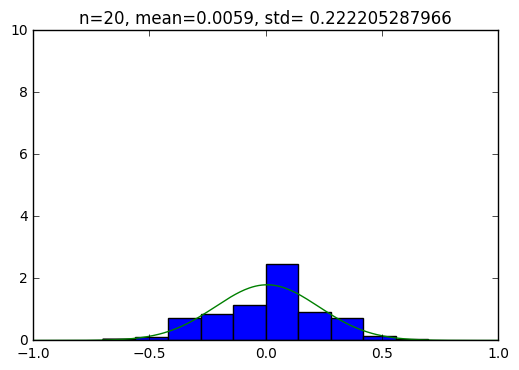

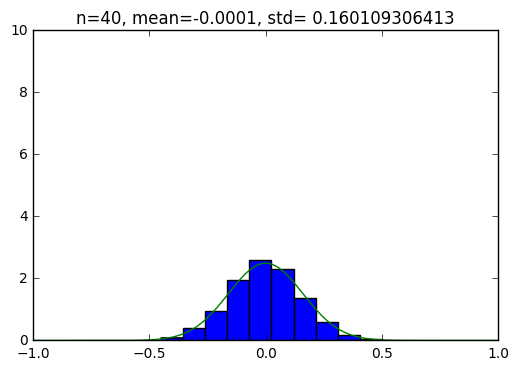

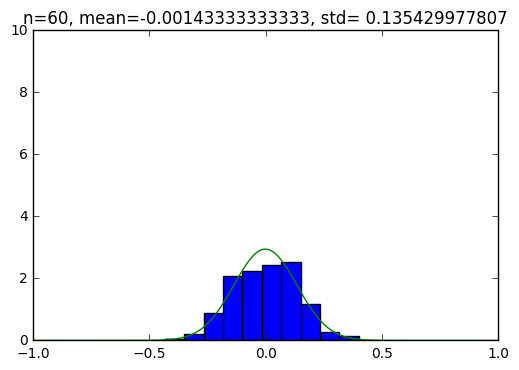

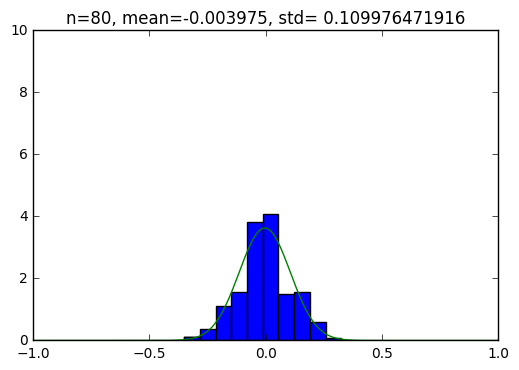

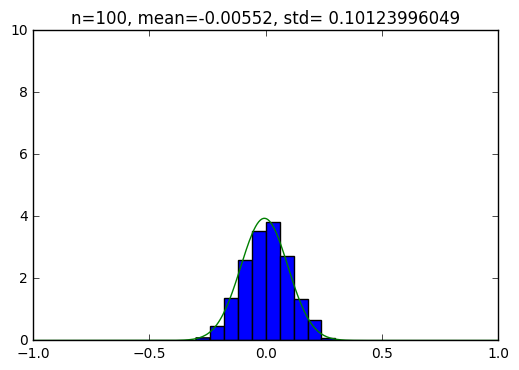

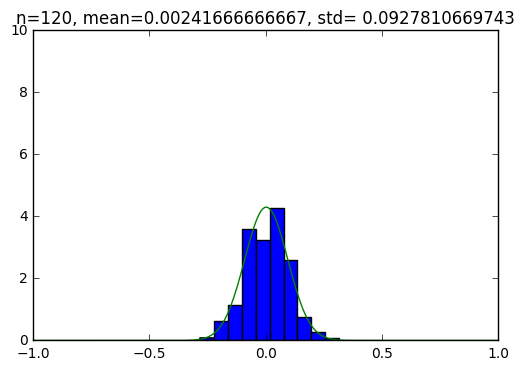

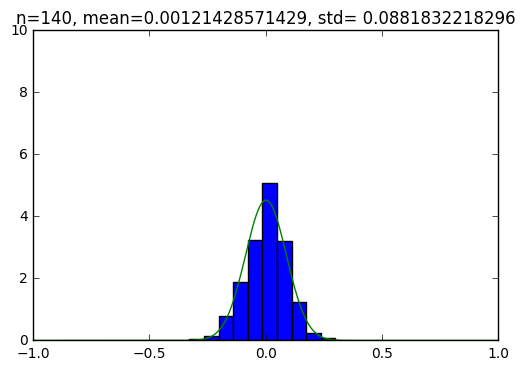

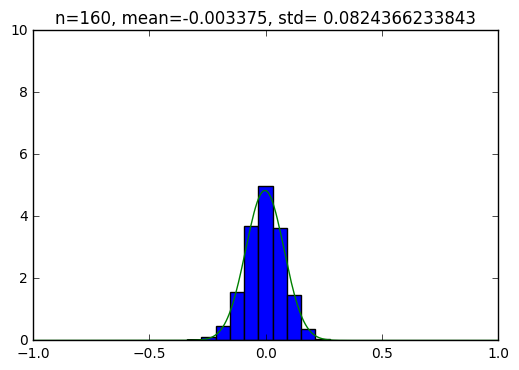

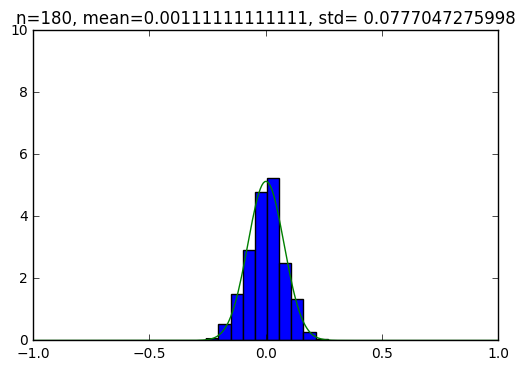

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

random.seed("yello")
N = 1000
max_n = 200
means = []
stds = []

for n in range(1, max_n):
    YY = np.zeros(N)  # this is where we store the y_n's
    for i in range(N):
        # compute average of n coin-tossing games
        YY[i] = sum([random.choice([-1,1]) for _ in range(n)]) / n
    means.append(np.mean(YY))
    stds.append(np.std(YY))
    if n % 20 == 0:
        plt.figure()
        plt.title("n=" + str(n) + ", mean=" + str(means[-1]) +  ", std= " + str(stds[-1]))
        hist_and_fit(YY, 10)
        plt.axis([-1,1,0,10])

Observations:
* Looks like the distribution of $y_n$'s is centered at zero. 
* The distribution of $y_n$'s is looking sharper and sharper, more and more likely to be close to zero as n increases.
* The distribution of $y_n$'s is looking more and more like a normal distribution

If we take $n \rightarrow \infty$...

**Theorem**: (Law of large numbers) If we are sampling $x_1,...,x_n$ from a probability distribution $X$, and look at the probability distribution of the average:

$$y_n = \frac{x_1 + x_2 + ... + x_n}{n},$$

then, as $n$ goes to infinity, $A_n$ approaches the constant probability distribution that always gives $\mu$, the mean of $X$ the probability 1.
In other words, the probability 

$$P((\lim_{n\rightarrow \infty} y_n) = \mu ) = 1$$

<br>

*Remark*: This is regardless of what shape $X$ has. 

Let's see if that's really happening. Is the mean of our 1000 samlings of y_n really going to the mean of x as $n$ increases?

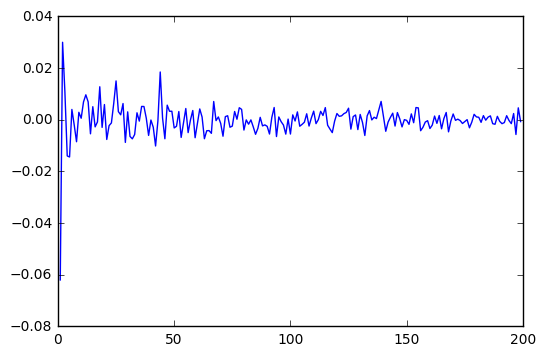

In [3]:
plt.plot(range(1,max_n), means)

What about standard deviation?

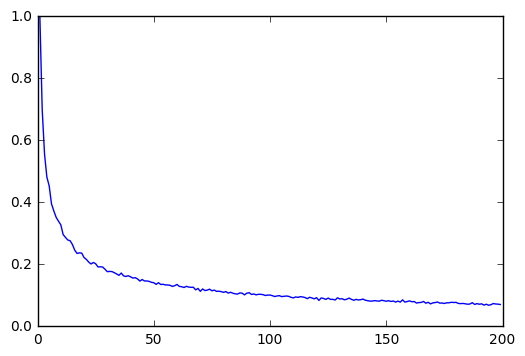

In [4]:
plt.plot(range(1,max_n), stds)

It looks like standard deviation is also going to 0. Does that make sense?

It looks like going to zero very nicely though. Could it be $1/n$?

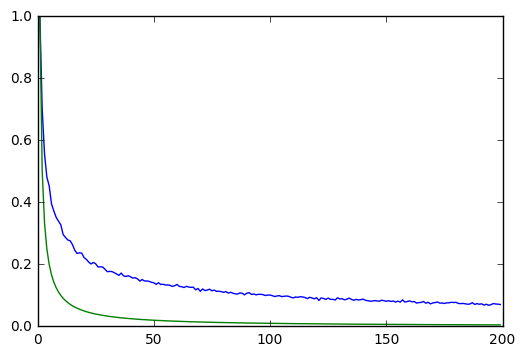

In [12]:
plt.plot(range(1,max_n), stds)
plt.plot(range(1,max_n), 1 / np.array(range(1,max_n)))

Not quite. Maybe $\frac{1}{\sqrt{n}}$?

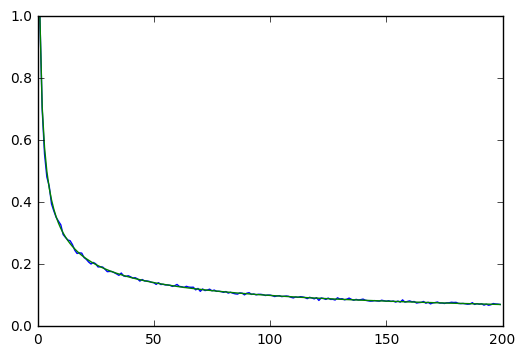

In [6]:
plt.plot(range(1,max_n), stds)
plt.plot(range(1,max_n), 1 / np.sqrt(np.array(range(1,max_n))))

Whoa? Perfect fit. So as $n\rightarrow \infty$, the mean of the nth average is going to 0 (the mean of the original distribution) and the standard deviation is going to $\frac{1}{\sqrt{n}}$.

**Cental Limit Theorem** Let $x_n$ be coming from a probability distribution with mean $\mu$ and standard deviation $\sigma$, and let

$$y_n = \frac{x_1 + x_2 + ... + x_n}{n},$$

be the average. As $n \rightarrow \infty$, the distribution of $y_n$ approaches the normal distribution:

$$N(\mu, \frac{\sigma}{\sqrt{n}})$$

with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

Note that this is independent of the original shape of $x$. This means that if you have many many things averaging out, you are certaint o get a normal distribution! That's why normal distribution is the most standard distribution.

In [7]:
# Remark: many people write N(mu, sigma^2) for their normal distributions (sigma^2 is called varience). 
# I am keeping consistent with the previous lectures here and writing sigma, but should probably write sigma^2
# in the notation of normal distribution. 